In [1]:
# Import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv("online_retail.csv", encoding="ISO-8859-1")
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Data Cleaning

In [4]:
# Convert all column names to snake_case
def to_snake(name):
    # insert underscore between lowercase and uppercase letters
    name = re.sub(r'(?<!^)(?=[A-Z])', '_', name)
    return name.lower()

df.columns = [to_snake(col) for col in df.columns]
df.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_i_d', 'country'],
      dtype='object')

In [5]:
# Rename customer_i_d → customer_id
df = df.rename(columns={"customer_i_d": "customer_id"})
df.columns


Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_no    541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  int64  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   customer_id   406829 non-null  float64
 7   country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [12]:
# Drop missing rows
df = df.dropna()
# Remove duplicate rows
df = df.drop_duplicates()

In [9]:
# Remove cancelled invoices (those starting with C)
df = df[~df['invoice_no'].astype(str).str.startswith('C')]


In [10]:
# Keep only positive quantity
df = df[df['quantity'] > 0]


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_no    392732 non-null  object 
 1   stock_code    392732 non-null  object 
 2   description   392732 non-null  object 
 3   quantity      392732 non-null  int64  
 4   invoice_date  392732 non-null  object 
 5   unit_price    392732 non-null  float64
 6   customer_id   392732 non-null  float64
 7   country       392732 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


In [14]:
# remove unwanted StockCode values
df = df[df['stock_code'].str.contains(r'\d')]


In [17]:
# Covert DataTypes 
# convert invoice_date to datetime
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

# convert invoice_no to int
df['invoice_no'] = df['invoice_no'].astype(str).str.replace('.0','')
df['invoice_no'] = df['invoice_no'].astype(int)

# convert customer_id to int
df['customer_id'] = df['customer_id'].astype(str).str.replace('.0','')
df['customer_id'] = df['customer_id'].astype(int)



In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391316 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    391316 non-null  int64         
 1   stock_code    391316 non-null  object        
 2   description   391316 non-null  object        
 3   quantity      391316 non-null  int64         
 4   invoice_date  391316 non-null  datetime64[ns]
 5   unit_price    391316 non-null  float64       
 6   customer_id   391316 non-null  int64         
 7   country       391316 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 26.9+ MB


In [19]:
# Create total_price column
df['total_price'] = df['quantity'] * df['unit_price']
df.head()


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
# Ploting Charts 

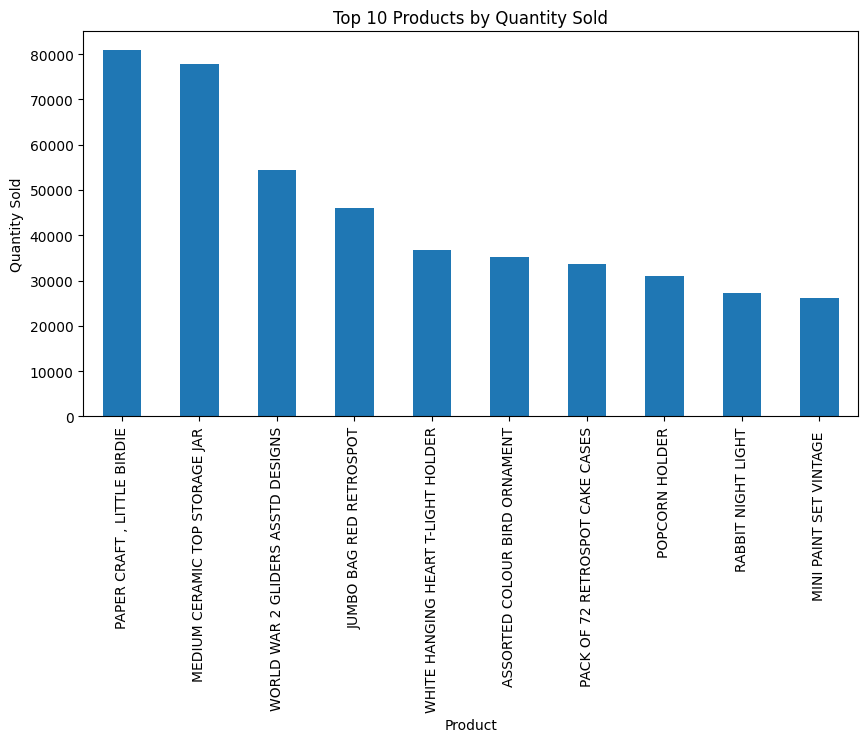

In [24]:
# 1. Top 10 products
top_products = df.groupby('description')['quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_products.plot(kind='bar')
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Product")
plt.ylabel("Quantity Sold")
plt.show()


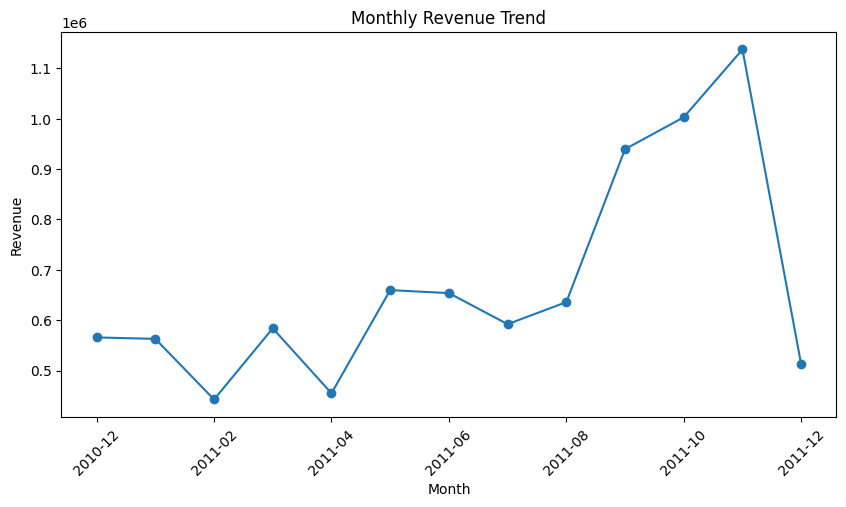

In [27]:
# 2. Monthly revenue trend
df['Month'] = df['invoice_date'].dt.to_period('M').astype(str)

monthly = df.groupby('Month')['total_price'].sum()

plt.figure(figsize=(10,5))
monthly.plot(kind='line', marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()


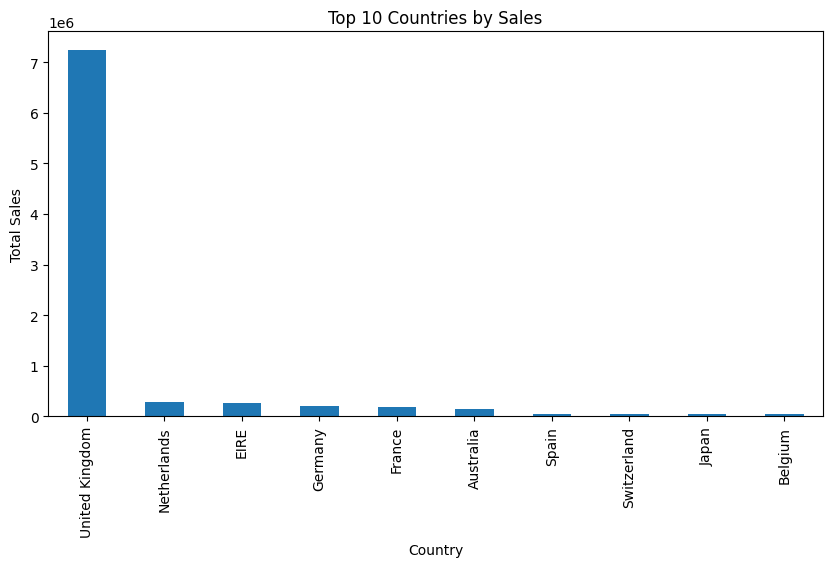

In [29]:
# 3. Country-wise sales
country_sales = df.groupby('country')['total_price'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
country_sales.plot(kind='bar')
plt.title("Top 10 Countries by Sales")
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.show()


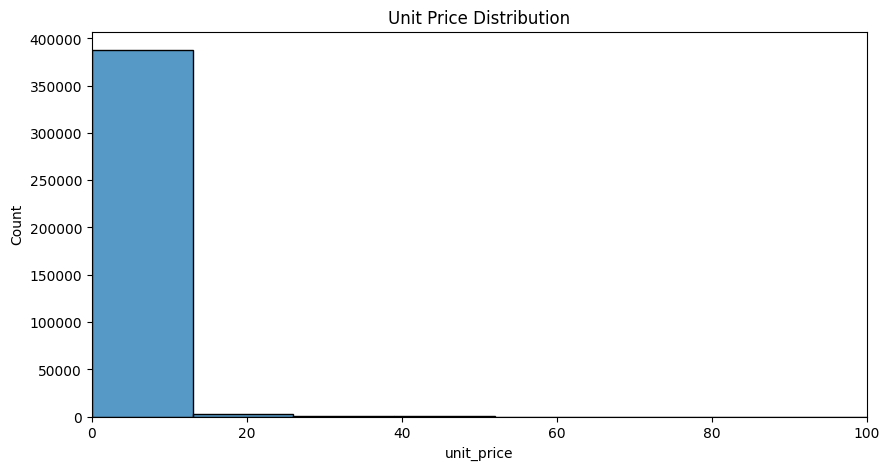

In [32]:
# 4. Distribution of unit price
plt.figure(figsize=(10,5))
sns.histplot(df['unit_price'], bins=50)
plt.xlim(0,100)
plt.title("Unit Price Distribution")
plt.show()


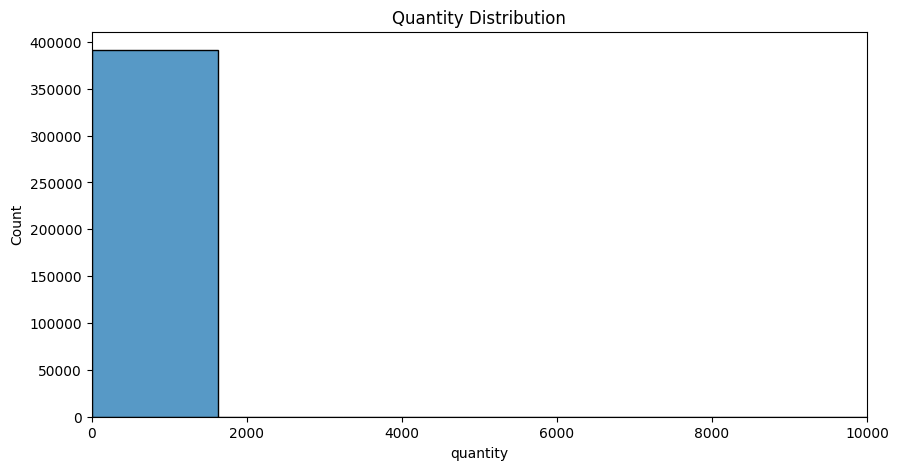

In [38]:
# 5. Distribution of quantity
plt.figure(figsize=(10,5))
sns.histplot(df['quantity'], bins=50)
plt.xlim(0,10000)
plt.title("Quantity Distribution")
plt.show()


In [39]:
df.to_csv("cleaned_retail.csv", index=False)
